In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Perzeptronen
Sind die einfachste Version eines neuronalen Netzwerks.

Im Folgenden wollen wir die grundlegensten binären Funktionen anhand von logischen Operationen aus der boolschen Algebra nachbilden. (not A ist unär)

`def binäre Funktionen`: sind mathematische Funktionen, die zwei Eingabegrößen (Argumente) verwenden und eine Ausgabe liefern. Der Begriff "binär" bedeutet, dass genau zwei Argumente benötigt werden. Unär ist dann mit nur einem Argument.

### Not Rezeptron:

In [4]:
A = random.randint(0,1)

def NOT(A):
    w1 = -1
    b = 1

    return (w1 * A + b) > 0

# test
print(A, NOT(A))
    

1 False


### And Perzeptron:

In [5]:
# A already defined
B = random.randint(0,1)  # (soll eigentlich binäre Zahl sein)

def AND(A, B):
    w1 = 1
    w2 = 1
    b = -1 

    return (w1*A + w2*B + b) > 0

print(A, B, AND(A, B))


1 1 True


### Or Rezeptron:

In [6]:
def OR(A, B):
    w1 = 1
    w2 = 1
    b = 0

    return (w1*A + w2*B + b) > 0
    
print(A, B, OR(A,B))

1 1 True


##### Let´s define a general function for y, the perceptron output.
### Receptron function y:

In [7]:
# by the way, we don´t need to define an extra b. Let´s assume b = w0x0 with w0 = b, xn = 1

def function_y(w: np.array, x: np.array) -> bool:
    return ((w @ x) > 0)


In [8]:
# let´s try it out for AND

w = np.array([-1, 1, 1])
x = np.array([1, A, B])


AND_algebra = function_y(w, x)

print(A, B, AND_algebra)

1 1 True


In [9]:
# example for floating point precision-errors, when A=B=1

w = np.array([-0.9, 0.5, 0.5])
x = np.array([1, A, B])

a = w @ x
print(a)

# so although there are other possibilities other than taking integers as weights and biases, ints are more preferrable due to the prevention of precision-errors. (although that doesn´t really matter when they numbers/floats far enough apart)

0.09999999999999998


### Graphical visualisation of firing of perceptron
Our next goal is to visualize the area/Bereich in dem das Perzeptron feuert, beziehungsweise ab wann die Bedingung der Aktivierungsfunktion erfüllt ist.


#### AND Perzeptron - Graph:

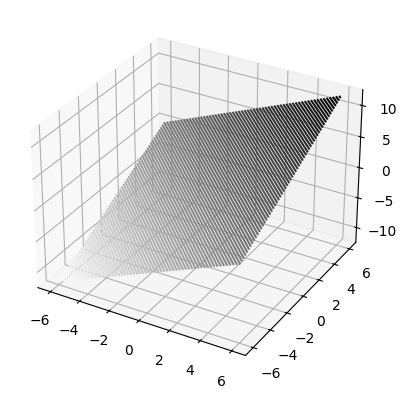

In [10]:
def y(x1, x2):
    w1 = 1
    w2 = 1
    return (w1*x1 + w2*x2)

x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)

X1, X2 = np.meshgrid(x1, x2)
Y = y(X1, X2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 150, cmap='binary')

#`TODO` instead of just trying trivial example cases for the weights and the biases of the logical operation perceptron, let´s try to find an abstract way to find the possible combinations of weights and biases. One way to do this, is by graphical visualisation. But we can also do it algebraically, by finding the convex hull of the matrix Ax<b (Ungleichungssysteme mit...)

Jetzt wollen wir die Gewichte des neuronalen Netzwerks selbst trainieren 

### Trainieren des neuronalen Netzwerks

Theoretisch ist es möglich die weights und bias für das Netzwerk anhand der Lösungsmenge für die Ungleichungssysteme zu bestimmen. Wir versuchen es jedoch mit einer Methode nach der wir die outputs vom Netzwerk mit bestimmten weights vergleichen und anhand ständigen Feedbacks dann die weights anpassen. 

In [11]:
trainingsdaten = np.array([[0,0], [0,1], [1,0], [1,1]])
# Das sind unsere Trainingsdaten für x1 und x2. Uns fehlt noch y (Feedback quasi)

### AND Perzeptron Lernalgorithmus

Hier lernt das Perzeptron nach dem **stochastischen Gradientenabstieg**.  

*Die Gewichte werden nach jedem Trainingsbeispiel geupdatet*

In [12]:
# Aktivierungsfunktion definieren
def a_heaviside(w: np.array , x: np.array):
    return (w.T @ x) > 0 

# Trainingsdaten
x = np.array([[1,1,1], [1,1,0], [1,0,1], [1,0,0]], dtype=float) # bias b = w0*x0, mit x0 = 1
y = np.array([1,0,0,0], dtype=float)

def AND_perceptron_online(epochen=10, a=0.2):
    w = np.zeros(3)
    for e in range(epochen):
        for i in range(len(y)):
            y_hat_i = a_heaviside(w, x[i])
            w += a * (y[i] - y_hat_i) * x[i]
    return w

AND_perceptron_online()

# Hier ist der Unterschied, dass du die Gewichte (für die Berechnung von y_hat) nach jedem Trainingsbeispiel updatest

array([-0.4,  0.2,  0.4])

Im Folgenden lernt das Perzeptron nach dem **Full-batch Gradientenabstieg**.

*Die Gewichte werden erst nach berechnen aller Trainingsbeispiele geupdatet*

In [13]:
# Ansatz wie es dem Gradientenabstieg folgt:
def AND_lalg(epochen=3, a=0.2):
    w = np.zeros(3)
    for e in range(epochen):
        y_hat = np.array([a_heaviside(w, xi) for xi in x])
        for i in range(len(y)):
            w += a *x[i] *(y[i]- y_hat[i])
    return w
        
AND_lalg()


# Mit lineare Algebra:
def AND_lalg(epochen=3, a=0.2):
    w = np.zeros(3)
    for e in range(epochen):
        y_hat = np.array([a_heaviside(w, xi) for xi in x])
        w += a * (x.T) @ (y- y_hat)
    return w
        
AND_lalg()

# Hier werden die Gewichte für die Berechnung von y_hat erst nach jeder Epoche geupdatet
# Man sieht hier, es genügen allein schon 3 Epochen damit das Modell konvergiert.

array([-0.2,  0.2,  0.2])

gucken dass linie irgendwie dazeiscehen ist fehlerfunktion wie gut trennung ist, lineare seperierbarkeit => keinen Datensatz den man perfekt erkennen/ trennen kann (weiterer grund fehlerfunktion)
ada lin perzeptron

### ADALINE Perzeptron

#### AND ADALINE Perzeptron

Mit **Full-Batch Gradientenabstieg**

In [14]:
class ADALINE:
    def __init__(self, x: np.array, y: np.array):
        self.x = x
        self.y = y

    # Aktivierungsfunktion definieren
    def a_linear(self, w, x):
        return w.T @ x
    

    def AND_adal(self, epochen=10, a=0.2):
        w = np.zeros(3)
        for e in range(epochen):
            y_hat = np.array([self.a_linear(w, xi) for xi in self.x])
            w += a * (self.x.T) @ (y- y_hat)
        return w
        
    def predict(self, W, X):
        self.W = W
        self.X = X
        raw_output = (W.T) @ X
        return 1 if raw_output >= 0.5 else 0
            

# Trainingsdaten
x = np.array([[1,1,1], [1,1,0], [1,0,1], [1,0,0]], dtype=float) # bias b = w0*x0, mit x0 = 1
y = np.array([1,0,0,0], dtype=float)

model = ADALINE(x,y)
w = model.AND_adal()
print(w.shape)
print(x.shape)

print(model.predict(w, x[1]))


# Hier sind mehrere hunderte Epochen benötigt, bis das Modell konvergiert. 
# Aufschluss darüber inwiefern genau sich perzeptron und adaline unterscheiden und welche Vorteile die einzelnen 
# Methoden bringen, wird uns bei genauerer Betrachtung der geometrischen Intiuition hinter diesen geben.

(3,)
(4, 3)
0


Mit **Stochastischen Gradientenabstieg**

In [15]:
# Aktivierungsfunktion definieren
def a_linear(w: np.array , x: np.array):
    return w.T @ x

# Trainingsdaten
x = np.array([[1,1,1], [1,1,0], [1,0,1], [1,0,0]], dtype=float) # bias b = w0*x0, mit x0 = 1
y = np.array([1,0,0,0], dtype=float)

def AND_adal_online(epochen=1000, a=0.2):
    w = np.array([0,0,0], dtype=float)
    for _ in range(epochen):
        for i in range(len(y)):
            # 1) Vorhersage mit aktuellem Gewicht
            y_hat_i = a_linear(w, x[i])    # a_linear(w, x[i]) = w.T @ x[i]
            # 2) Fehler berechnen
            error = y[i] - y_hat_i
            # 3) Gewichte aktualisieren
            w += a * error * x[i]
    return w

AND_adal_online()

def predict(w, x):
    raw_output = w.T @ x
    # z.B. ab 0.5 als 1 interpretieren
    return 1 if raw_output >= 0.5 else 0

predict(w,x[0])

1

Das macht Adaline besser gegenüber Perzeptron:

Bei Adaline wird Fehler minimiert
Bei Perzeptron hat man keine Kontrolle,  
Beim Perzeptron hat man keine Fehlerfunktion, man korrigiert nur jedes Mal wenn Fehler hat irgendwie.

# Reinforcement learning
Sehr wertvoll 
maschine optimiert sich selbst 

## Hexapawn 
Eine vereinfachte Version von Schach

Maschine lernt am besten, je besser wir spielen
- Modell bauen, was Züge in dem Spiel angibt
- Lernt immer, wenn wir was falsch machen
- Weiß (wir) fangen an
- Muss sich merken, dass manche Züge nicht gut waren => Strafe/Feedback
bei Schach eher im Kontext

In [16]:
# Neuronales Netzwerk, welches Schach 
# Am Anfang sollte alles random sein
# Wie setze ich bei neuronalem Netzwerk die Bedingungen für das Spiel?


In [17]:
# Erstmal Spiel mit Spielregeln programmieren

class Hexapawn:
    def __init__(self, x_position, y_position):
        self.x_position = x_position
        self.y_position = y_position

    def Spielregeln(x_position, y_position):
    # Spieler_1 beginnt
        spieler1 = spieler1.Hewapawn





    # Spieler 1 (wir) ist Objekt der Klasse mit Attributen x (A, B, oder C) und y (1, 2 oder 3) Position
    # Erste Bedingung ist, dass Spieler 1 anfängt 
